<a href="https://colab.research.google.com/github/anishthetechie/Machine_Learning_Systems/blob/main/MNIST_DIGIT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [59]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #grayscale image classification

In [60]:
type(X_train) #np array

numpy.ndarray

In [61]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


60k images, 28x28 pixels, grayscale images
Each image has dimension 28x28

In [ ]:
print(X_train[10])


In [63]:
cv2_imshow(X_train[10])

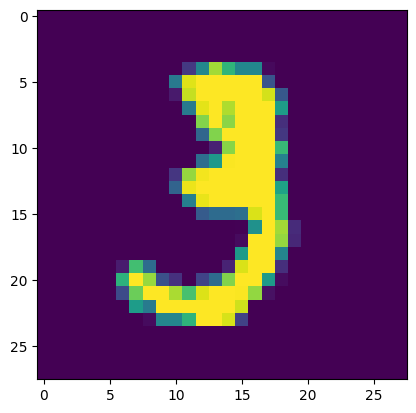

In [64]:
plt.imshow(X_train[10])
plt.show()

In [65]:
print(Y_train[10])

3


In [66]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [67]:
print(np.unique(X_test)) #scale for grayscale image: 0 - 255

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [68]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [69]:
#NORMALIZATION - all values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[98])

RNN => text/audio data; CNN => image data

In [71]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),
  keras.layers.Dense(60, activation = 'relu'),
  keras.layers.Dense(60, activation = 'relu'),
  keras.layers.Dense(10, activation = 'sigmoid'), #we have 10 classes (0-9)
])

In [72]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
#TRAINING THE NN
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2842 - accuracy: 0.9177
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1336 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0964 - accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0618 - accuracy: 0.9804


In [74]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0989 - accuracy: 0.9707
0.09885021299123764 0.9707000255584717


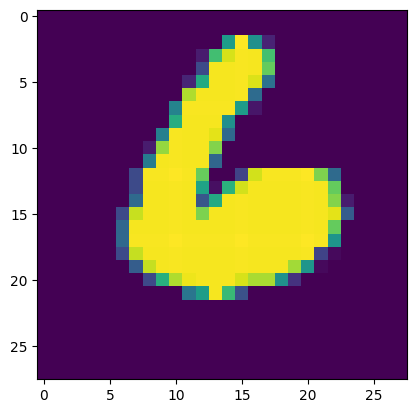

In [75]:
plt.imshow(X_test[8474])
plt.show()

In [76]:
print(Y_test[8474])

6


In [77]:
Y_hat = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [78]:
print(Y_hat[8474])

[3.0641892e-04 1.7228138e-05 1.6083117e-01 3.7381542e-06 2.5812875e-02
 9.7424453e-03 1.0000000e+00 4.4705134e-06 7.8102329e-04 5.2176317e-09]


In [79]:
Y_hat_output = [np.argmax(i) for i in Y_hat]
print(Y_hat_output)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 5, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [80]:
conf_mat = confusion_matrix(Y_test, Y_hat_output)

In [81]:
print(conf_mat)

tf.Tensor(
[[ 965    0    1    1    1    6    3    2    1    0]
 [   0 1120    5    1    0    1    4    0    4    0]
 [   8    0 1001    2    1    0    4    8    8    0]
 [   1    0    1  975    0   16    1   12    4    0]
 [   2    0    1    0  962    1   10    1    1    4]
 [   3    1    1    7    2  862    8    1    7    0]
 [   3    2    1    1    6    1  941    0    3    0]
 [   1    4    7    3    1    0    0 1009    2    1]
 [   5    1    1    3    5    5    5    6  942    1]
 [   4    5    0    6   34   13    0   11    6  930]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True Labels')

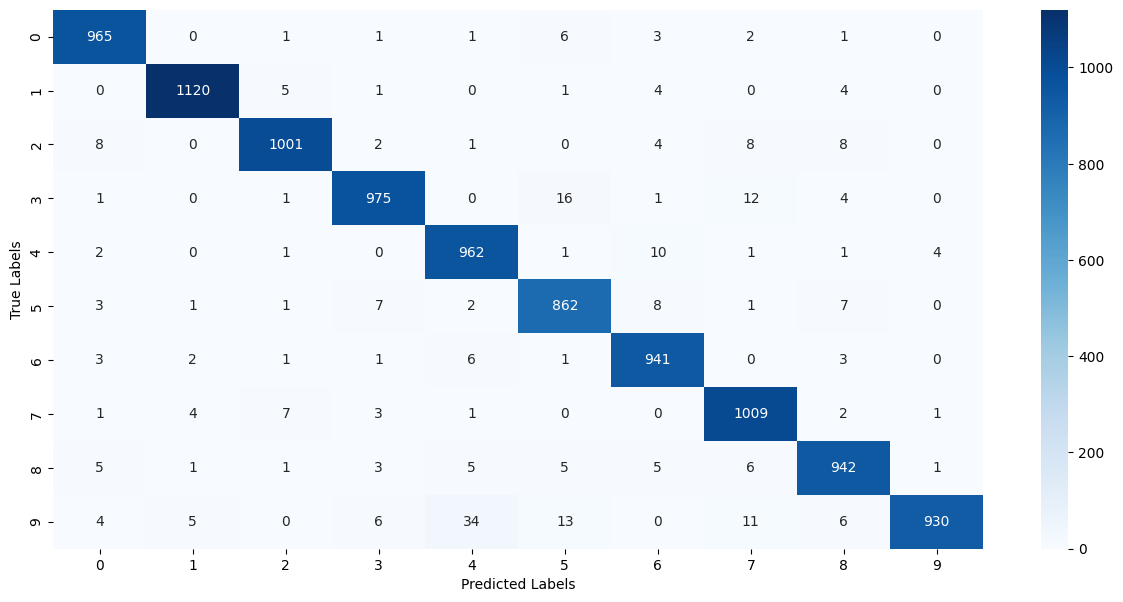

In [82]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [83]:
feature_img_loc = '/content/MNIST7.jpg'
feature_img = cv2.imread(feature_img_loc)

In [84]:
type(feature_img)

numpy.ndarray

In [ ]:
print(feature_img)
cv2_imshow(feature_img)

In [86]:
feature_img.shape

(122, 123, 3)

3 represents RGB color
We wish to convert it to grayscale

In [87]:
cvt_to_grayscale = cv2.cvtColor(feature_img, cv2.COLOR_RGB2GRAY)

In [88]:
cvt_to_grayscale.shape

(122, 123)

This img is 238x238 px.
We wish to resize it to 28x28 px.

In [89]:
resized_feature_img = cv2.resize(cvt_to_grayscale, (28,28)) #function from PIL

In [90]:
resized_feature_img.shape

(28, 28)

In [91]:
cv2_imshow(resized_feature_img)

In [92]:
 resized_feature_img = resized_feature_img/255

In [93]:
reshaped_feature_img = np.reshape(resized_feature_img, [1,28,28]) #1 feature img of dim 28x28 px

In [94]:
feature_pred = model.predict(reshaped_feature_img)
print(feature_pred)

1/1 [==============================] - 0s 38ms/step
[[7.6291343e-04 5.3427722e-03 7.3464656e-01 9.7852725e-01 4.1286754e-03
  2.0111817e-01 5.6953525e-08 9.9999970e-01 4.7766443e-02 6.7509830e-01]]


In [95]:
feature_pred_label = np.argmax(feature_pred)
print(feature_pred_label)

7


Please enter the path of feature image: /content/MNIST7.jpg


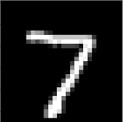

In [98]:
feature_img_loc = input('Please enter the path of feature image: ')
feature_img = cv2.imread(feature_img_loc)
cv2_imshow(input_img)
cvt_to_grayscale = cv2.cvtColor(feature_img, cv2.COLOR_RGB2GRAY)

In [100]:
resized_feature_img = cv2.resize(cvt_to_grayscale, (28,28))
resized_feature_img = resized_feature_img/255
reshaped_img = np.reshape(resized_feature_img, [1,28,28])
feature_pred = model.predict(reshaped_img)
feature_pred_label = np.argmax(feature_pred)
print('The digit is', feature_pred_label)

1/1 [==============================] - 0s 22ms/step
The digit is 7
